# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

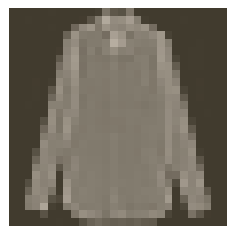

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here

from torch import nn
import torch.nn.functional as F

class F_Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        
        # flatten the images
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [4]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim

model = F_Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [5]:
# TODO: Train the network here
num_epochs = 20 # 20 epochs - ~8 mins on cpu i5-7200u, ~3.2 mins on gpu Nvidia Geforce GTX950m 2GB DDR5

train_on_gpu = True if torch.cuda.is_available() else False
if train_on_gpu:
    model.to('cuda:0')

for e in range(num_epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        if train_on_gpu:
            images, labels = images.to('cuda:0'), labels.to('cuda:0')
        
        # zero out the gradients so they don't accumulate
        optimizer.zero_grad()
        
        # do a forward pass
        logits = model(images)
        
        # calculate the loss
        loss = criterion(logits, labels)
        
        # do a backward pass to calculate the gradients
        loss.backward()
        
        # update the gradients
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {}/{}\t".format(e+1, num_epochs))
        print(f"Running loss: {running_loss/len(trainloader)}")
else:
    print("Training done")


Epoch 1/20	
Running loss: 0.5062860483998683
Epoch 2/20	
Running loss: 0.38427371620687084
Epoch 3/20	
Running loss: 0.34489778604016885
Epoch 4/20	
Running loss: 0.321062004825136
Epoch 5/20	
Running loss: 0.3018708126599601
Epoch 6/20	
Running loss: 0.2887321781438551
Epoch 7/20	
Running loss: 0.27339249302043334
Epoch 8/20	
Running loss: 0.2607691784991003
Epoch 9/20	
Running loss: 0.2541250058495477
Epoch 10/20	
Running loss: 0.2435014989775127
Epoch 11/20	
Running loss: 0.23517018094309358
Epoch 12/20	
Running loss: 0.22839774654459344
Epoch 13/20	
Running loss: 0.21662105263661602
Epoch 14/20	
Running loss: 0.216287086135956
Epoch 15/20	
Running loss: 0.20801047131276207
Epoch 16/20	
Running loss: 0.2001265684869498
Epoch 17/20	
Running loss: 0.1930247967574261
Epoch 18/20	
Running loss: 0.1915574866587292
Epoch 19/20	
Running loss: 0.181297759424204
Epoch 20/20	
Running loss: 0.1786663317675593
Training done


torch.Size([1, 10])


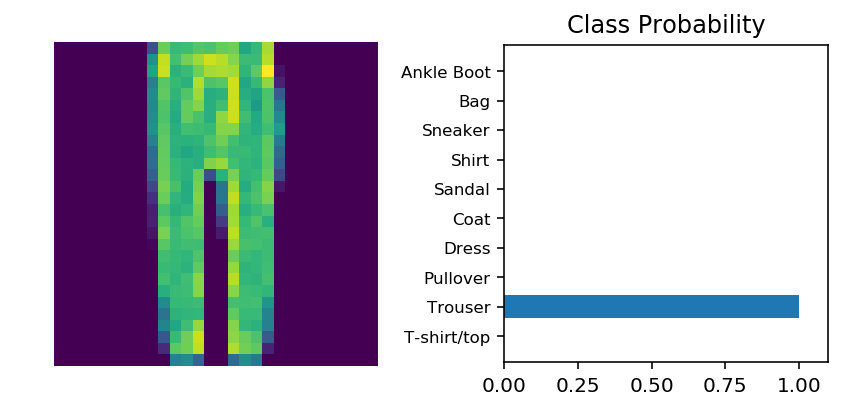

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()

# # added my own code to move the model and tensors back to cpu
if train_on_gpu:
    model.to('cpu')
    images, labels = images.to('cpu'), labels.to('cpu')
    
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(model(img), dim=1)
print(ps.shape)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')